In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
data = pd.read_csv('Data_set.csv')


In [4]:
expectations_data = data['Expect']
def preprocess_text(text):
    text = text.lower()
    text = ''.join(e for e in text if e.isalnum() or e.isspace())
    return text

cleaned_expectations = expectations_data.apply(preprocess_text)


Most common expectations from investments:
2030: 32
3040: 5
1020: 3

Summary of main expectations from investments:
- 2030
- 3040
- 1020


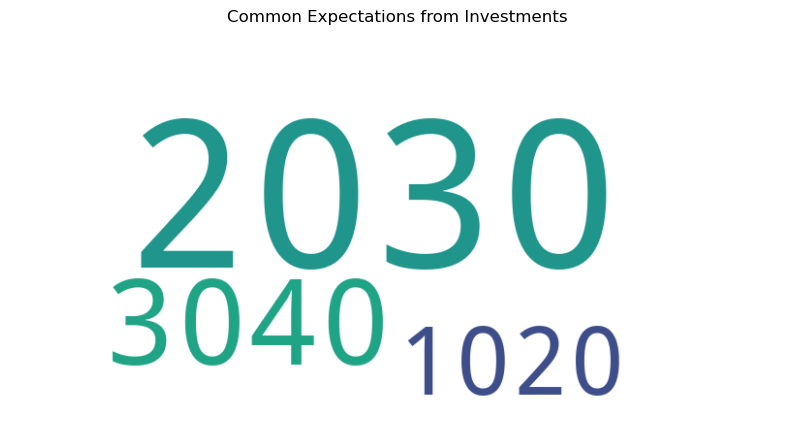

In [6]:

all_words = ' '.join(cleaned_expectations).split()
word_counts = Counter(all_words)

common_stop_words = {'the', 'and', 'for', 'to', 'a', 'in', 'of', 'is', 'with', 'that', 'it', 'as', 'on', 'are', 'this', 'by', 'an', 'be', 'at', 'or', 'from', 'we', 'will', 'not'}
common_words = {word: count for word, count in word_counts.items() if word not in common_stop_words}

most_common_expectations = Counter(common_words).most_common(10)
print("Most common expectations from investments:")
for expectation, count in most_common_expectations:
    print(f"{expectation}: {count}")

main_expectations = [expectation for expectation, count in most_common_expectations]
summary = "\n".join([f"- {expectation.capitalize()}" for expectation in main_expectations])

print("\nSummary of main expectations from investments:")
print(summary)

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate_from_frequencies(common_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Expectations from Investments')
plt.show()
